Практическое задание

Для выполнения работ $P_1, P_2, P_3$ сельскохозяйственное предприятие может приобрести тракторы марок А и B стоимостью соответственно $c_1$ и $c_2$ ден. ед.  каждый. С использованием новой техники необходимо выполнить не менее $b_1$ условных единиц работы $P_1$, не менее $b_2$ условных единиц работы $P_2$ и не менее  $b_3$ условных единиц работы $P_3$. За рассматриваемый промежуток времени с использованием трактора марки A можно выполнить $a_{11}$ условных единиц работы $P_1$, $a_{21}$ условных единиц работы $P_2$ или $a_{31}$ условных единиц работы $P_3$; с использованием трактора марки Б – $a_{12}$ условных единиц работы $P_1$, $a_{22}$ условных единиц работы $P_2$ или $a_{23}$ условных единиц работы $P_3$. 

Требуется:

Составить экономико-математическую модель, позволяющую найти такой вариант приобретения тракторов той или другой марки, при котором будут выполнены все необходимые работы, а затраты на новую технику будут минимальны;
Пользуясь методом ветвей и границ, найти оптимальный вариант приобретения тракторов.

In [14]:
import numpy as np
import matplotlib.pyplot as plt 

$ x_1 * c_1 + x_2 * c_2 \rightarrow min $  <br>
$x_1 * a_{11} + x2 * a_{12} >= b_1$ <br>
$x_1 * a_{21} + x2 * a_{22} >= b_2$ <br>
$x_1 * a_{31} + x2 * a_{32} >= b_3 $

$
b_1 = 20, b_2 = 190, b_3 = 88, a_{11} = 4, a_{21} = 19, a_{31}=4, a_{12} = 1, a_{22} = 15, a_{32} = 15, c_1= 3, c_2 = 5$

$   3x_1 +  5x_2 \rightarrow min $  <br>
$  4x_1 +  1x_2  >= 20$ <br>
$ 19x_1 + 15x_2  >= 190$ <br>
$ 4x_1 + 15x_2  >= 88 $ <br>
$ x_1, x_2 >=0$

In [62]:
def self_test(x1, x2):
    print('F=', 3*x1 + 5*x2)
    print(4*x1 + x2)
    print(19*x1 + 15*x2)
    print(4*x1 + 15*x2)

In [48]:
x_2 = np.linspace(0, 10, 100)

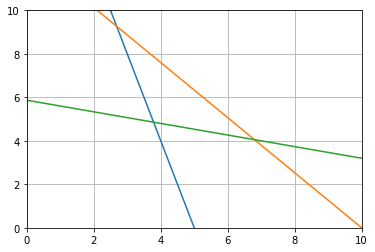

In [43]:
plt.plot((20-x_2)/4, x_2)
plt.plot((190-15* x_2)/19, x_2)
plt.plot((88-15*x_2)/4, x_2)
plt.xlim([0,10])
plt.ylim([0,10])
plt.grid()

Мы видим первое пересечение около точки (7, 4). Добавим условия для x1 >=7 и x1 <=6

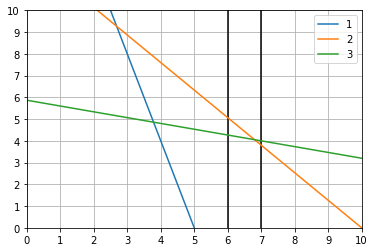

In [65]:
plt.plot((20-x_2)/4, x_2, label='1')
plt.plot((190-15* x_2)/19, x_2, label='2')
plt.plot((88-15*x_2)/4, x_2, label='3')
plt.vlines(7, 0, 10)
plt.vlines(6, 0, 10)
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks(np.arange(0, 11))
plt.yticks(np.arange(0, 11))
plt.legend()
plt.grid()

Получаем решение x1=7, x2=4. Проверяем условия. F=41 - наш рекорд

In [63]:
self_test(7, 4)

F= 41
32
193
88


In [71]:
#Для x1=6 получаем x2 = 5.0666, снова не целое число. Оставляем x1 <= 6, и делим задачу на х2>=6 и x2<=5
(190-19*6)/15

5.066666666666666

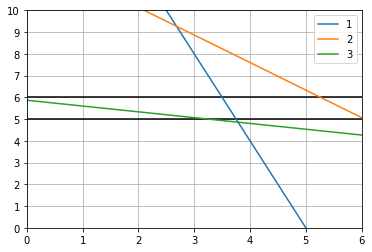

In [73]:
plt.plot((20-x_2)/4, x_2, label='1')
plt.plot((190-15* x_2)/19, x_2, label='2')
plt.plot((88-15*x_2)/4, x_2, label='3')
plt.hlines(5, 0, 6)
plt.hlines(6, 0, 6)
plt.xlim([0,6])
plt.ylim([0,10])
plt.xticks(np.arange(0, 7))
plt.yticks(np.arange(0, 11))
plt.legend()
plt.grid()

In [75]:
# ветку х2<=5 сразу отбрасываем, поскольку это пространство лежит ниже области решений 
# для x2>=6 получаем
(190-15* 6)/19

5.2631578947368425

Визуально получается, что данным методом мы двигаемся от нашей исходной точки в разные стороны над линией допустимых значений. Следующими целочисленными точками будет (6,6) и (7,5). Для них значения целевой функции будет: 48 и 46 соответственно. Поскольку эти значения больше нашего исходного рекорда - построенией ветвей на этом прервется. Хорошее начальное приближение помогает алгоритму отработать быстрее, поскольку рекорды не обновляются, так что построение заканчивается быстрее.

In [78]:
self_test(7,5), self_test(6,6)

F= 46
33
208
103
F= 48
30
204
114


(None, None)